In [1]:
# Dependencies
import pathlib
import pandas as pd
import pandas_datareader as pdr
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import scipy.optimize as sci_plt

from datetime import datetime
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
import itertools
import statsmodels.tsa.stattools as ts

/Users/andrewsebastian/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 1, 1), end=datetime(2025, 3, 18)).iloc[:,0])], axis = 1)
        names.append(i)
    data.columns = names
    return data

# Stock Tickers

## Stock Categories:
**Industrial**
* BYD (EV)
* CRRC (Rolling Stock, Railway producer)
* Techtronic (Power tool)

**Consumer**
* Yum China (FnB)
* Anta (Sportswear)
* Budweiser (Beer)

**Technology**
* SMIC (Semiconductor)
* Xiaomi (Consumer Electronics)
* Sunny Optical (Optical lenses) | not like

## Possible Pairs
1. BYD, Tesla, Ford, Toyota, Rivian
2. Yum China, Jollibee, yum brands, mcdonalds, starbucks
3. Anta, Nike, Lululemon, Lining
4. Budweiser, Phillip Morris, Constellation brands
5. SMIC, TEL, TSMC, NVDA, MSFT, HUAWEI
6. Xiaomi, Apple, Samsung, Huawei 

## Tickers

In [3]:
t_ind = ['1211.HK', 'TSLA', 'F', 'TM', 'RIVN']
t_fnb = ['9987.HK', 'JBFCF', 'YUM', 'MCD', 'SBUX']
t_spw = ['2020.HK', 'NKE', 'LULU', '2331.HK']
t_ber = ['1876.HK', 'PM', 'STZ']
t_smc = ['0981.HK', 'TSM', 'NVDA', 'MSFT', 'TEL']

# Industrial

In [14]:
df_ind = get_historical_Data(t_ind)
print(df_ind.shape)
df_ind.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

(1344, 5)


,1211.HK,TSLA,F,TM,RIVN
Date,,,,,
2025-03-11,350.200012,230.580002,9.69,184.529999,10.79
2025-03-12,355.000000,248.089996,9.59,185.649994,11.06
2025-03-13,360.799988,240.679993,9.53,182.970001,10.61
2025-03-14,385.799988,249.979996,9.73,186.669998,10.75
2025-03-17,385.600006,238.009995,9.92,188.410004,11.02


In [19]:
corr_matrix = df_ind.corr()
print(corr_matrix)

          1211.HK      TSLA         F        TM      RIVN
1211.HK  1.000000  0.812266  0.703535  0.559154  0.158408
TSLA     0.812266  1.000000  0.698697  0.473042  0.448353
F        0.703535  0.698697  1.000000  0.604200  0.764273
TM       0.559154  0.473042  0.604200  1.000000 -0.140429
RIVN     0.158408  0.448353  0.764273 -0.140429  1.000000


<Axes: >

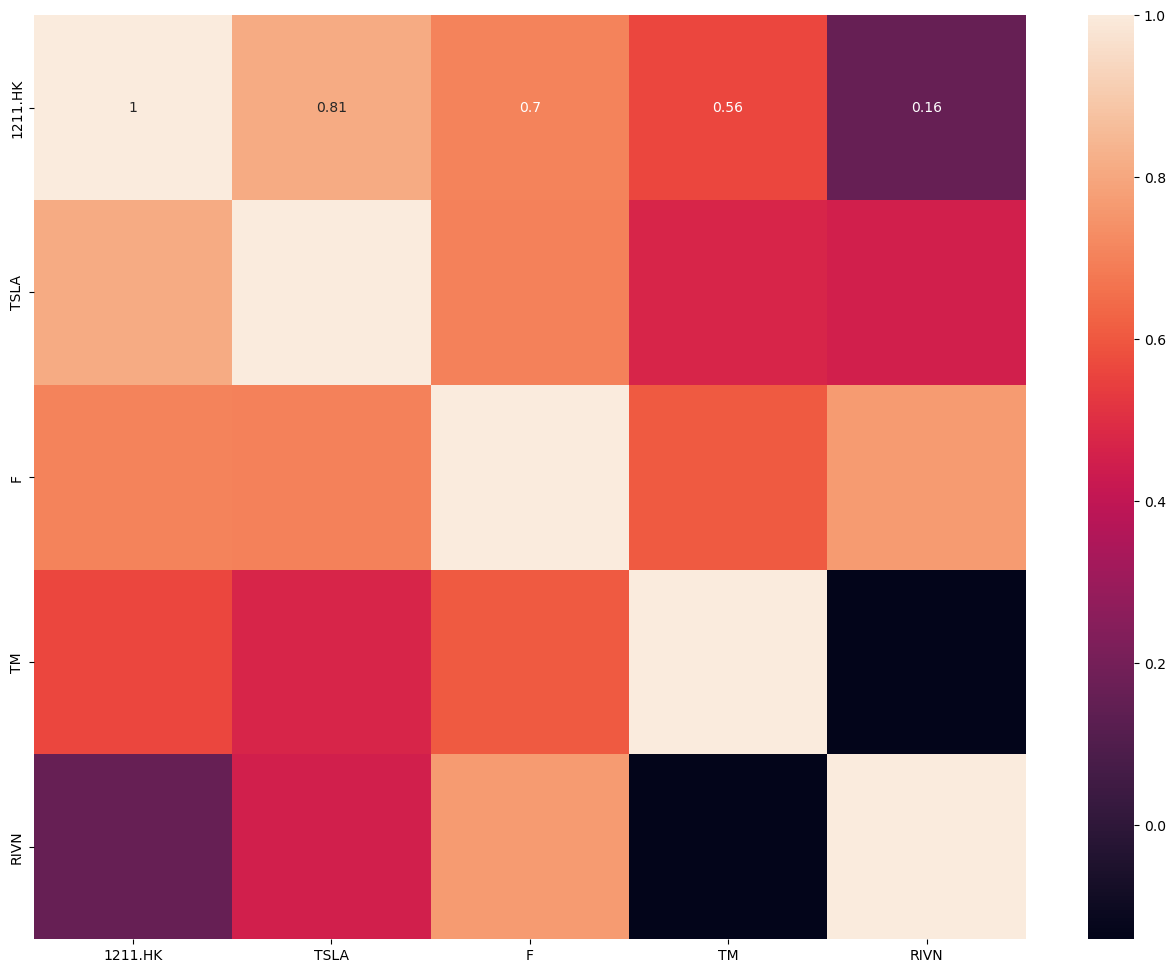

In [23]:
figure(figsize= (16, 12), dpi=100)
sns.heatmap(corr_matrix, annot=True)